In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('6Combinations.csv')
df = df.sample(frac = 1) # Shuffle a Dataframe rows
df.head()

,1disk,2disk,3disk,4disk,5disk,6disk,5.00E+01,5.20E+01,5.40E+01,5.60E+01,...,1.58E+03.3,1.58E+03.4,1.59E+03,1.59E+03.1,1.59E+03.2,1.59E+03.3,1.59E+03.4,1.60E+03,1.60E+03.1,1.60E+03.2
395,0.6,0.3,0.2,0.1,0.4,0.5,0.136,0.162,0.154,0.158,...,0.1610,0.1600,0.1580,0.1580,0.1580,0.1560,0.1540,0.1540,0.1530,0.1530
263,0.6,0.1,0.5,0.4,0.2,0.3,0.129,0.168,0.157,0.172,...,0.1450,0.1420,0.1400,0.1410,0.1400,0.1380,0.1370,0.1360,0.1350,0.1350
158,0.4,0.1,0.3,0.2,0.6,0.5,0.125,0.159,0.147,0.154,...,0.0922,0.0904,0.0898,0.0918,0.0924,0.0920,0.0921,0.0916,0.0912,0.0919
107,0.3,0.1,0.2,0.4,0.6,0.5,0.139,0.190,0.177,0.185,...,0.0792,0.0790,0.0786,0.0793,0.0798,0.0794,0.0786,0.0795,0.0801,0.0804
58,0.1,0.4,0.3,0.6,0.2,0.5,0.155,0.190,0.183,0.192,...,0.0931,0.0939,0.0932,0.0938,0.0938,0.0938,0.0937,0.0945,0.0941,0.0934


In [3]:
# Specifying the X and Y
X_train=df.iloc[:200,:6]
Y_train=df.iloc[:200,6:]

# Splitting data into 70:30 train:test ratio
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=33)

In [4]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.08690171553110103

In [6]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.08690171553110103

In [7]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse = sqrt(mse)
rmse

0.1303865268654311

In [8]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [9]:
gridsearch.best_params_

{'n_neighbors': 5}

In [10]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, train_preds_grid)
train_mape = mean_absolute_percentage_error(Y_train, train_preds_grid)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, test_preds_grid)
print("Train MSE is ",train_mse)
print("Train RMSE is ",train_rmse)
print("Train MAE is ", train_mae)
print("Train MAPE is ", train_mape)

print("Test MSE is ",test_mse)
print("Test RMSE is ",test_rmse)
print("Tset MAE is ", test_mae)

Train MSE is  0.010527650969307807
Train RMSE is  0.1026043418638208
Train MAE is  0.06649698674521355
Train MAPE is  0.25024053584019135
Test MSE is  0.017589111633436426
Test RMSE is  0.132623948189746
Tset MAE is  0.08428394673539519


In [11]:
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)
GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
print(gridsearch.best_params_)
{'n_neighbors': 25, 'weights': 'distance'}


test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, test_preds_grid)
test_mape = mean_absolute_percentage_error(Y_test, test_preds_grid)
print("Test MSE is ", test_mse)
print("Test RMSE is ", test_rmse)
print("Test MAE is ", test_mae)
print("Test MAPE is ", test_mape)

{'n_neighbors': 5, 'weights': 'distance'}
Test MSE is  0.016599522219395736
Test RMSE is  0.12883913310557368
Test MAE is  0.08125875686324727
Test MAPE is  0.2957888036497331


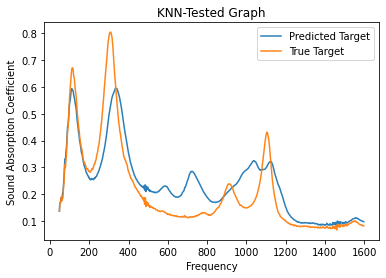

In [15]:
freq_range = range(48,1600,2)

plt.plot(freq_range, test_preds_grid[11], "-", alpha=14,label="Predicted Target")
plt.plot(freq_range, Y_test.iloc[11], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.legend()
plt.title("KNN-Tested Graph")
plt.show()

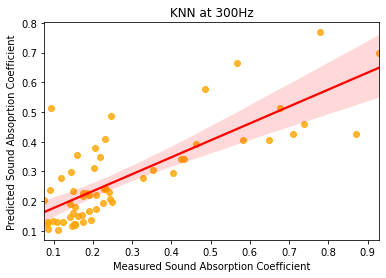

In [13]:
knn_reg = sns.regplot(x=Y_test.iloc[:,150], y=test_preds_grid[:,150], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()